<h1>Machine Learning to predict if a passenger will survive Titanic</h1>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [0]:
#Load Data
titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [0]:
#Shape of dataset
print('Rows: ', titanic.shape[0])
print('Columns: ', titanic.shape[1])
print('\n')
print(titanic.describe())

Rows:  891
Columns:  15


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [0]:
#Get count of survivors
#0 = did not survive, 1 = survived
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

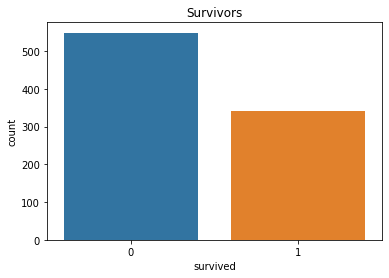

In [0]:
sns.countplot(titanic['survived'])
plt.title('Survivors')
plt.show()

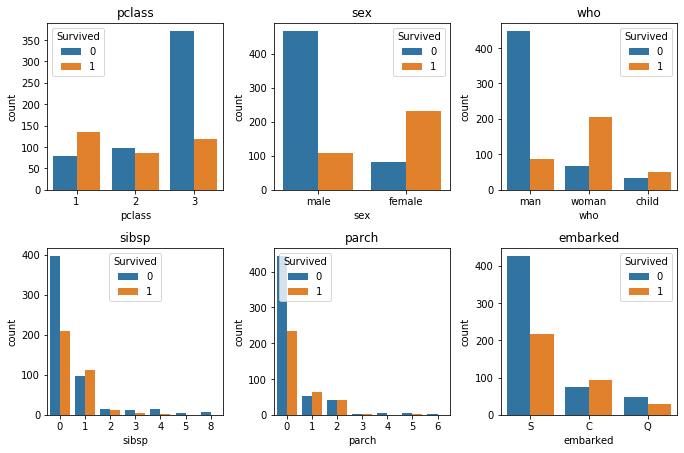

In [0]:
#Visualize the count of survivors by various columns/features/categories

titanic.columns

cols = ['pclass', 'sex','who','sibsp','parch','embarked']

n_rows = 2
n_cols = 3

#subplot grid and figure size of each plot (2x3)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
  for c in range(0,n_cols):

    #index to go through number of columns (0-5)
    i = r*n_cols + c
    #show where to position each subplot
    ax = axs[r][c]
    sns.countplot(titanic[cols[i]],hue=titanic['survived'],ax=ax)
    ax.set_title(cols[i])
    ax.legend(title='Survived',loc='best')

plt.tight_layout()

In [0]:
#Survival Rate
titanic.groupby(['parch','embarked'])[['survived']].mean()

survived
parch embarked          
0     C         0.512195
      Q         0.434783
      S         0.285124
1     C         0.633333
      Q         0.000000
      S         0.560976
2     C         0.714286
      Q         0.000000
      S         0.461538
3     C         1.000000
      S         0.500000
4     S         0.000000
5     Q         0.000000
      S         0.250000
6     S         0.000000

In [0]:
#Survival Rate
titanic.pivot_table('survived',index='fare',columns='class')

class,First,Second,Third
fare,,,
0.0000,0.00,0.0,0.25
4.0125,NaN,NaN,0.00
5.0000,0.00,NaN,NaN
6.2375,NaN,NaN,0.00
6.4375,NaN,NaN,0.00
...,...,...,...
227.5250,0.75,NaN,NaN
247.5208,0.50,NaN,NaN
262.3750,1.00,NaN,NaN


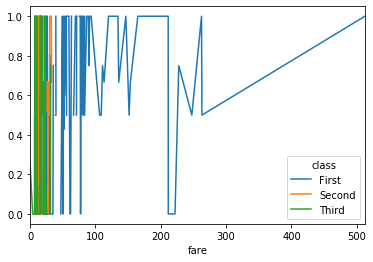

In [0]:
#Visual Survival Rate
titanic.pivot_table('survived',index='fare',columns='class').plot()
plt.show()

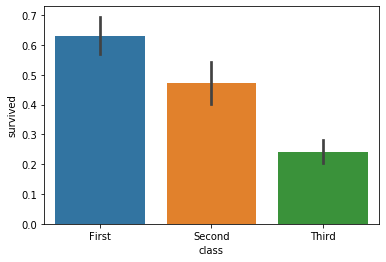

In [0]:
#Survival Rate of each Class
sns.barplot(x='class',y='survived',data=titanic)
plt.show()

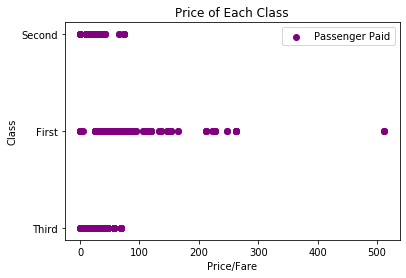

In [0]:
#Prices paid by each class
#x axis = fare, y axis = class
plt.scatter(titanic['fare'],titanic['class'],color='purple',label='Passenger Paid')
plt.title('Price of Each Class')
plt.xlabel('Price/Fare')
plt.ylabel('Class')
plt.legend()
plt.show()

In [0]:
#Count the empty_values/NaN values in each column
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [0]:
#Values in each column and get a count
for val in titanic:
  print(titanic[val].value_counts())

0    549
1    342
Name: survived, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
male      577
female    314
Name: sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64
S    644
C    168
Q     77
Name: embarked, dtype: int64
Third     491
First     216
Second    184
Name: class, dtype: int64
man      537
woman    271
child     83
Name: who, dtype: int64
True     537
False    354
Name: adult_male, dtype: int64
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: dec

In [0]:
#Drop columns
titanic.drop(['deck','embark_town','alive','class','who','alone','adult_male'],axis=1,inplace=True)

#Remove rows with missing values
titanic.dropna(subset=['embarked','age'],inplace=True)

In [0]:
#Count the new number of rows and columns in dataset
print("Rows: ",titanic.shape[0])
print("Columns: ",titanic.shape[1])

print(titanic.dtypes)

Rows:  712
Columns:  8
survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object


In [0]:
labelencoder = LabelEncoder()

titanic.iloc[:,2] = labelencoder.fit_transform(titanic.iloc[:,2].values)

titanic.iloc[:,7] = labelencoder.fit_transform(titanic.iloc[:,7].values)

In [0]:
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

<h1>Machine Learning</h1>


In [0]:
#Split the data into independent(x) and dependent(y) variables

X = titanic.iloc[:,1:8].values
y = titanic.iloc[:,0].values

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [0]:
#Scale the data
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
#Create function with many machine learning models

def models(X_train,y_train):

  #Logistic Regression
  log = LogisticRegression(random_state=0)
  log.fit(X_train,y_train)

  #KNN
  knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
  knn.fit(X_train,y_train)

  #SVC (linear kernel)
  svc_lin = SVC(kernel='linear', random_state=0)
  svc_lin.fit(X_train,y_train)

  #SVC (RBF kernel)
  svc_rbf = SVC(kernel='rbf', random_state=0)
  svc_rbf.fit(X_train,y_train)

  #Gaussian NB
  gauss = GaussianNB()
  gauss.fit(X_train,y_train)

  #Decision Tree
  tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(X_train,y_train)

  #Random Forest
  forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
  forest.fit(X_train,y_train)

  #Training Accuracy
  print('[0]Logistic Regression Training Accuracy: ', log.score(X_train,y_train))
  print('[1]KNN Training Accuracy: ', knn.score(X_train,y_train))
  print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train,y_train))
  print('[3]SVC RBF Regression Training Accuracy: ', svc_rbf.score(X_train,y_train))
  print('[4]GaussianNB Regression Training Accuracy: ', gauss.score(X_train,y_train))
  print('[5]Decision Tree Regression Training Accuracy: ', tree.score(X_train,y_train))
  print('[6]Forest Regression Training Accuracy: ', forest.score(X_train,y_train))


  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

<h1>Accuracy</h1>

In [0]:
#Get and train all of the models
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy:  0.8014981273408239
[1]KNN Training Accuracy:  0.8614232209737828
[2]SVC Linear Training Accuracy:  0.7715355805243446
[3]SVC RBF Regression Training Accuracy:  0.8389513108614233
[4]GaussianNB Regression Training Accuracy:  0.7902621722846442
[5]Decision Tree Regression Training Accuracy:  0.9906367041198502
[6]Forest Regression Training Accuracy:  0.9756554307116105


<h1>Confusion Matrix</h1>

In [0]:
for i in range(len(model)):
  cm = confusion_matrix(y_test,model[i].predict(X_test))

  #TN,FP,FN,TP
  TN,FP,FN,TP = confusion_matrix(y_test,model[i].predict(X_test)).ravel()

  score = (TP+TN)/(TP+TN+FN+FP)
  print(cm)
  print('Model[{0}] Testing Accuracy = {1}'.format(i,score))
  print('\n')



[[94 11]
 [20 53]]
Model[0] Testing Accuracy = 0.8258426966292135


[[87 18]
 [18 55]]
Model[1] Testing Accuracy = 0.797752808988764


[[93 12]
 [23 50]]
Model[2] Testing Accuracy = 0.8033707865168539


[[96  9]
 [22 51]]
Model[3] Testing Accuracy = 0.8258426966292135


[[90 15]
 [19 54]]
Model[4] Testing Accuracy = 0.8089887640449438


[[77 28]
 [27 46]]
Model[5] Testing Accuracy = 0.6910112359550562


[[86 19]
 [20 53]]
Model[6] Testing Accuracy = 0.7808988764044944




In [0]:
#Feature Importance
forest = model[6]
importances = pd.DataFrame({'feature':titanic.iloc[:,1:8].columns,'importance':np.round(forest.feature_importances_,3)})

#The row labels are the items in 'feature'
importances = importances.sort_values('importance',ascending=False).set_index('feature')

print(importances)

          importance
feature             
age            0.328
fare           0.272
sex            0.182
pclass         0.076
sibsp          0.058
parch          0.053
embarked       0.031


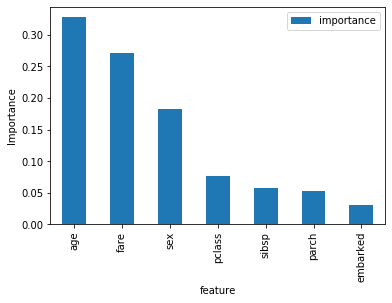

In [0]:
importances.plot.bar()
plt.ylabel('Importance')
plt.show()

In [0]:
#Random Forest Classifier Prediction

prediction = model[6].predict(X_test)

#1 = survive, 0 = did not survive
print(np.array(prediction))

#Actual
print(np.array(y_test))

#True or false predictions
print(np.array(prediction)==np.array(y_test))

[0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1
 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1
 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0]
[1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0
 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0
 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1
 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0]
[False  True  True  True  True  True  True False  True  True  True False
  True  True  True False  True False  True False  True False False  True
  True  True  True False  True False False  True False  True  True  True
  True  True False  True False False  True  True  True Fa

<h1>Out of Sample Data</h1>

In [0]:
#Each value corresponds to the feature/column of same index
survival = [[3,1,21,0,0,0,1]]

#StandardScaler
sc = StandardScaler()

#Out of sample data
survival_scaled = sc.fit_transform(survival)

#Random Forest Classifier (model[6]) Prediction
prediction = model[6].predict(survival)

if prediction == 0:
  print('Did not survive!')
elif prediction == 1:
  print('Survived!')

Did not survive!
